In [43]:
import numpy as np
from pyedflib import highlevel
import pyedflib as plib
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from utils import set_root
set_root()

Current working directory: /home/manni/physioex


In [17]:
path = "example_records/ST7011J0-PSG.edf"
signals, signal_headers, header = highlevel.read_edf(path)
len(signals), len(signal_headers)

(5, 5)

In [31]:
signal_headers

[{'label': 'EEG Fpz-Cz',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EEG Pz-Oz',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EOG horizontal',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EMG submental',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 

In [75]:
path = "example_records/ST7011JP-Hypnogram.edf"
_, _, dict = highlevel.read_edf(path)
annotations = dict['annotations']

In [105]:
annotations[0:100]


[[0.0, 1560.0, 'Sleep stage W'],
 [1560.0, 90.0, 'Sleep stage 1'],
 [1650.0, 570.0, 'Sleep stage 2'],
 [2220.0, 120.0, 'Sleep stage 1'],
 [2340.0, 60.0, 'Sleep stage 2'],
 [2400.0, 60.0, 'Sleep stage 3'],
 [2460.0, 30.0, 'Sleep stage 1'],
 [2490.0, 150.0, 'Sleep stage 2'],
 [2640.0, 90.0, 'Sleep stage 3'],
 [2730.0, 30.0, 'Sleep stage 2'],
 [2760.0, 30.0, 'Sleep stage 1'],
 [2790.0, 90.0, 'Sleep stage 2'],
 [2880.0, 120.0, 'Sleep stage W'],
 [3000.0, 60.0, 'Sleep stage 1'],
 [3060.0, 240.0, 'Sleep stage 2'],
 [3300.0, 240.0, 'Sleep stage W'],
 [3540.0, 60.0, 'Sleep stage 2'],
 [3600.0, 30.0, 'Sleep stage 3'],
 [3630.0, 30.0, 'Sleep stage 2'],
 [3660.0, 60.0, 'Sleep stage 1'],
 [3720.0, 90.0, 'Sleep stage W'],
 [3810.0, 120.0, 'Sleep stage 1'],
 [3930.0, 30.0, 'Sleep stage 2'],
 [3960.0, 60.0, 'Sleep stage 1'],
 [4020.0, 60.0, 'Sleep stage 2'],
 [4080.0, 90.0, 'Sleep stage 1'],
 [4170.0, 90.0, 'Sleep stage W'],
 [4260.0, 30.0, 'Sleep stage 1'],
 [4290.0, 150.0, 'Sleep stage 2'],
 [4440.

In [101]:
def plot_raw_signal(start, finish, title):
    #EEG Fpz-Cz
    signal_to_plot = signals[0][start*100:finish*100]
    for annotation in annotations:
        if start >= annotation[0] and finish <= annotation[0]+annotation[1]:
            print("corresponding annotation: ", annotation[2])

    t = np.linspace(0, 30, 3000)
    plt.figure(figsize=(10, 4))  # Define figure size
    sns.lineplot(x=t, y=signal_to_plot, color="b")
    
    # Labeling the plot
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Micro Volt [uV]')
    plt.ylim(+150, -150)

    # Display the plot
    plt.show()

corresponding annotation:  Sleep stage W


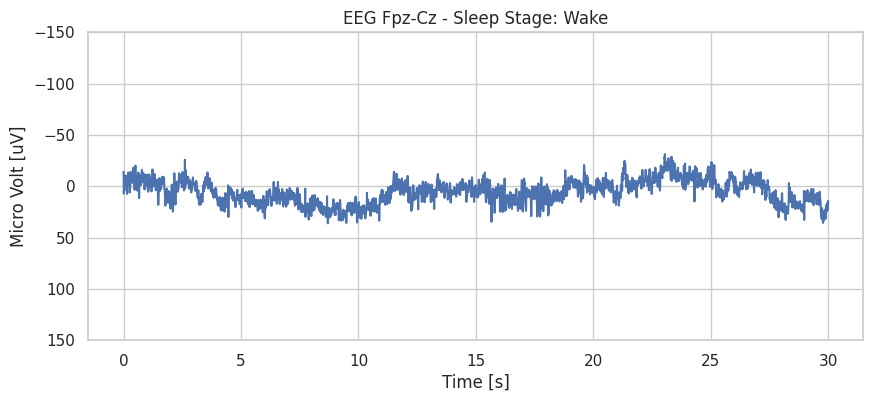

In [104]:
plot_raw_signal(160, 190, "EEG Fpz-Cz - Sleep Stage: Wake")

corresponding annotation:  Sleep stage 1


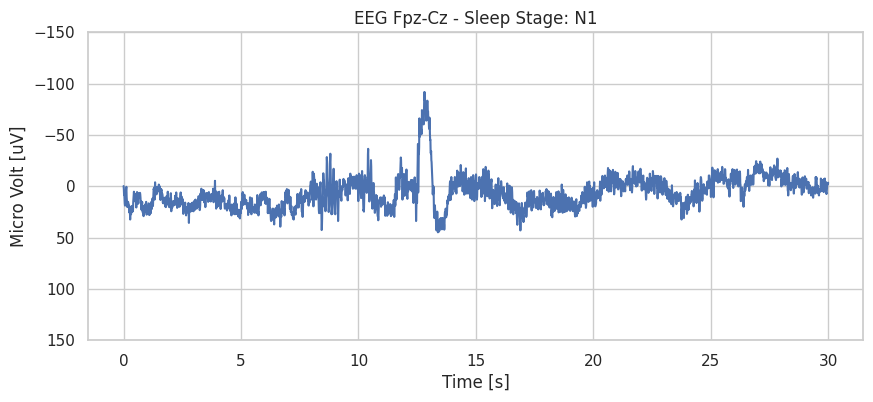

In [113]:
plot_raw_signal(2260, 2260+30, "EEG Fpz-Cz - Sleep Stage: N1")

corresponding annotation:  Sleep stage 1


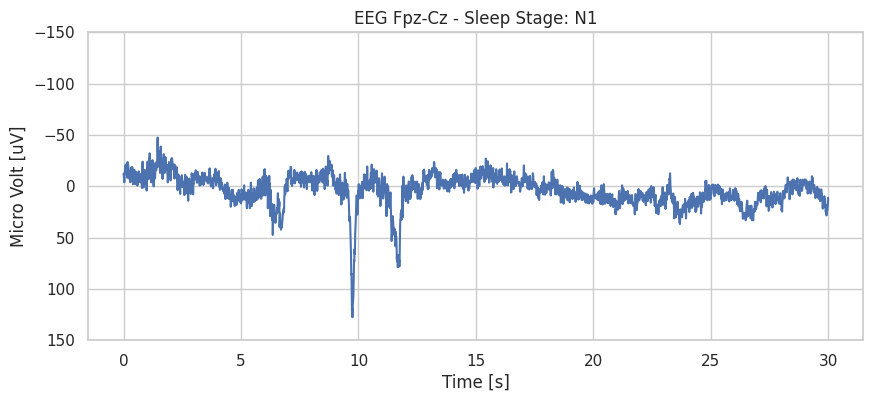

In [116]:
plot_raw_signal(2220, 2250, "EEG Fpz-Cz - Sleep Stage: N1")